### Data Loading and Preparation

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = r"C:\Users\MIRZA SHAHYAAR\Downloads\Face Recognition\lfw_funneled"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    horizontal_flip=True,  
    zoom_range=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 12161 images belonging to 5749 classes.
Found 1072 images belonging to 5749 classes.


### Model Architecture Design

In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Model Training and Validation

In [5]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10
381/381 [==============================] - 235s 603ms/step - loss: 9.0298 - accuracy: 0.0658 - val_loss: 4.5987 - val_accuracy: 0.2220
Epoch 2/10
381/381 [==============================] - 233s 611ms/step - loss: 2.6568 - accuracy: 0.4953 - val_loss: 4.3943 - val_accuracy: 0.2379
Epoch 3/10
381/381 [==============================] - 233s 611ms/step - loss: 1.3899 - accuracy: 0.7154 - val_loss: 4.3557 - val_accuracy: 0.2416
Epoch 4/10
381/381 [==============================] - 231s 606ms/step - loss: 0.9416 - accuracy: 0.8003 - val_loss: 4.0803 - val_accuracy: 0.2920
Epoch 5/10
381/381 [==============================] - 233s 610ms/step - loss: 0.7062 - accuracy: 0.8508 - val_loss: 3.8647 - val_accuracy: 0.3321
Epoch 6/10
381/381 [==============================] - 236s 620ms/step - loss: 0.5624 - accuracy: 0.8797 - val_loss: 3.9190 - val_accuracy: 0.3153
Epoch 7/10
381/381 [==============================] - 231s 607ms/step - loss: 0.4547 - accuracy: 0.9070 - val_loss: 3.9763 -

In [6]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")
model.save("face_recognition_model.h5")

34/34 [==============================] - 19s 541ms/step - loss: 3.8965 - accuracy: 0.3582
Validation Accuracy: 35.82%


### Performance Evaluation and Visualization

In [8]:
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

34/34 [==============================] - 18s 517ms/step - loss: 3.9812 - accuracy: 0.3629
Validation Loss: 3.9812
Validation Accuracy: 0.3629


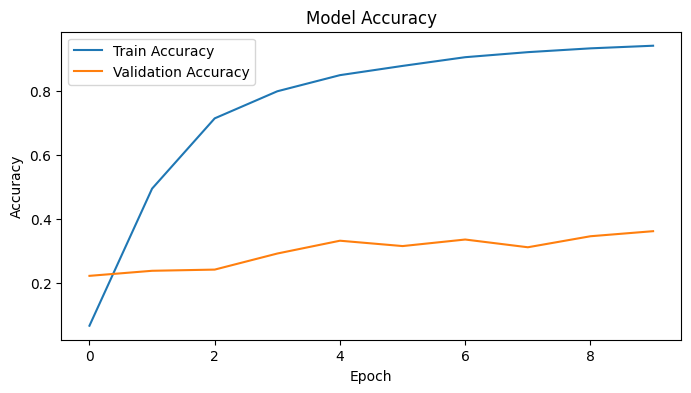

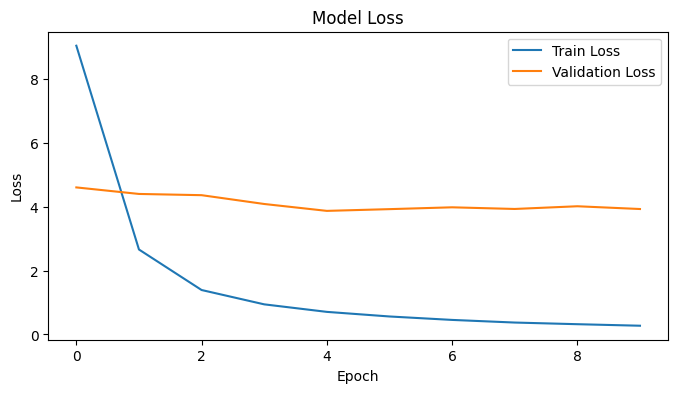

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


### Prediction on New Images

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\MIRZA SHAHYAAR\Downloads\Face Recognition\lfw_funneled\Abdoulaye_Wade\Abdoulaye_Wade_0003.jpg"

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  

prediction = model.predict(img_array)
print("Raw prediction:", prediction)


1/1 [==============================] - 2s 2s/step
Raw prediction: [[5.1419169e-10 1.1230765e-09 5.8549065e-14 ... 9.2774911e-08
  1.5632074e-12 3.5806396e-09]]


In [14]:
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class index:", predicted_class)

Predicted class index: [14]


In [16]:
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

predicted_class_idx = np.argmax(prediction, axis=1)[0]
predicted_class_name = index_to_class[predicted_class_idx]

print(f"Predicted class index: {predicted_class_idx}")
print(f"Predicted class name: {predicted_class_name}")


Predicted class index: 14
Predicted class name: Abdoulaye_Wade


### Model Saving

In [17]:
model.save("face_recognition_model.h5")